In [366]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score,classification_report, recall_score, precision_score


In [367]:
df = pd.read_csv('bank-full.csv', sep = ";")
df.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [368]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


# Outlier detection

/Users/vivek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


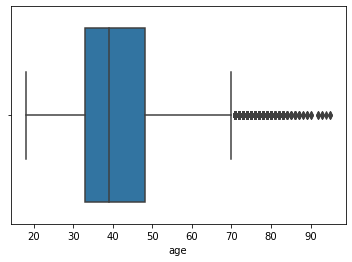

/Users/vivek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


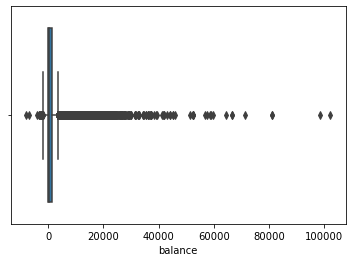

/Users/vivek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


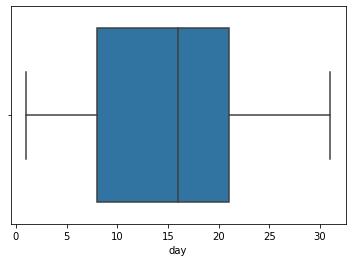

/Users/vivek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


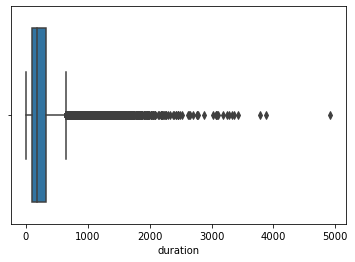

/Users/vivek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


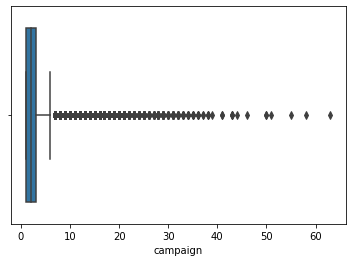

/Users/vivek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


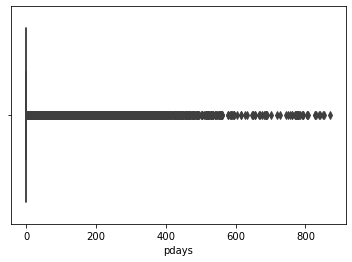

/Users/vivek/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


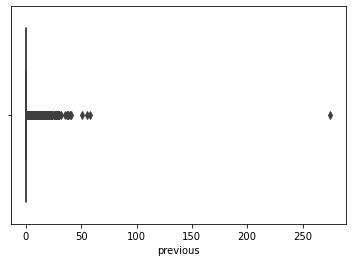

In [369]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
for i in df.select_dtypes(include=numerics).columns:
    sns.boxplot(df[i])
    plt.show()

In [370]:
q1_balance = df['balance'].quantile(0.25)
q2_balance = df['balance'].quantile(0.5)
q3_balance = df['balance'].quantile(0.75)

iqr = q3_balance-q1_balance
iqr
# Upper bound
upper = np.where(df['balance'] >= (q3_balance+1.5*iqr))
print(upper)
# Lower bound
lower = np.where(df['balance'] <= (q1_balance-1.5*iqr))
print(lower)
''' Removing the Outliers '''
df.drop(upper[0], inplace = True)
df.drop(lower[0], inplace = True)
df = df.reset_index().drop(columns = ["index"])
print("New Shape: ", df.shape)

(array([   34,    65,    69, ..., 45185, 45191, 45208]),)
(array([ 1896,  7413,  7756, 11655, 12909, 13687, 13708, 14434, 15682,
       17159, 18573, 20317, 25119, 25240, 31509, 32713, 38736]),)
New Shape:  (40480, 17)


In [371]:
q1_campaign = df['campaign'].quantile(0.25)
q2_campaign = df['campaign'].quantile(0.5)
q3_campaign = df['campaign'].quantile(0.75)

iqr = q3_campaign-q1_campaign
print("IQR:", iqr)
print("q1_campaign:", q1_campaign)
print("q2_campaign:", q2_campaign)
print("q3_campaign:", q3_campaign)
# Upper bound
upper = np.where(df['campaign'] >= (q3_campaign+1.5*iqr))
# Lower bound
lower = np.where(df['campaign'] <= (q1_campaign-1.5*iqr))
print(upper)
''' Removing the Outliers '''
df.drop(upper[0],axis = 0, inplace = True)
df.drop(lower[0],axis = 0, inplace = True)
df = df.reset_index().drop(columns = ["index"])
print("New Shape: ", df.shape)

IQR: 2.0
q1_campaign: 1.0
q2_campaign: 2.0
q3_campaign: 3.0
(array([  687,   737,   759, ..., 40195, 40200, 40311]),)
New Shape:  (36569, 17)


In [372]:
q1_duration = df['duration'].quantile(0.25)
q2_duration = df['duration'].quantile(0.5)
q3_duration = df['duration'].quantile(0.75)
df = df.reset_index().drop(columns = ["index"])
iqr = q3_duration-q1_duration
print("IQR:", iqr)
print("q1_duration:", q1_duration)
print("q2_duration:", q2_duration)
print("q3_duration:", q3_duration)
# Upper bound
upper = np.where(df['duration'] >= (q3_duration+1.5*iqr))
# Lower bound
lower = np.where(df['duration'] <= (q1_duration-1.5*iqr))
print(upper)
''' Removing the Outliers '''
#df.drop(upper[0], inplace = True)
#df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

IQR: 214.0
q1_duration: 109.0
q2_duration: 185.0
q3_duration: 323.0
(array([   36,    42,    52, ..., 36558, 36559, 36565]),)
New Shape:  (36569, 17)


In [373]:
### Leaving pdays for now

In [374]:
q1_pdays = df['pdays'].quantile(0.25)
q2_pdays = df['pdays'].quantile(0.5)
q3_pdays = df['pdays'].quantile(0.75)

iqr = q3_pdays-q1_pdays
print("IQR:", iqr)
print("q1_pdays:", q1_pdays)
print("q2_pdays:", q2_pdays)
print("q3_pdays:", q3_pdays)
# Upper bound
upper = np.where(df['pdays'] >= (q3_pdays+1.5*iqr))
# Lower bound
lower = np.where(df['pdays'] <= (q1_pdays-1.5*iqr))
print(upper)
''' Removing the Outliers '''
#df.drop(upper[0], inplace = True)
#df.drop(lower[0], inplace = True)
 
print("New Shape: ", df.shape)

IQR: 0.0
q1_pdays: -1.0
q2_pdays: -1.0
q3_pdays: -1.0
(array([    0,     1,     2, ..., 36566, 36567, 36568]),)
New Shape:  (36569, 17)


# Feature engineering

### Imbalance

In [375]:
for i in df.select_dtypes(exclude=numerics).columns.tolist()+["previous","pdays"]:
    
    x = (df[i].value_counts()/len(df)*100)
    y = pd.DataFrame(x).reset_index().drop("index", axis = 1).iloc[0][0]
#     print(x)
    if y >80:
        print(i)
        print(y)
#     print("\n")

default
98.06940304629605
loan
83.13872405589434
poutcome
81.04405370669146
y
88.2222647597692
previous
81.03038092373322
pdays
81.03038092373322


### Hypothesis Testing

In [376]:
from scipy.stats import chi2_contingency
for i in df.select_dtypes(exclude=numerics).columns.tolist():

    contigency= pd.crosstab(df['y'], df[i])
    c, p, dof, expected = chi2_contingency(contigency)

    print(i,"p_value: ",round(p,3))

job p_value:  0.0
marital p_value:  0.0
education p_value:  0.0
default p_value:  0.0
housing p_value:  0.0
loan p_value:  0.0
contact p_value:  0.0
month p_value:  0.0
poutcome p_value:  0.0
y p_value:  0.0


In [377]:
(df["default"].value_counts())

no     35863
yes      706
Name: default, dtype: int64

In [378]:
X = df.drop(columns = ["y"])
X1 = pd.get_dummies(X,columns = ["job","marital",'education',
                                'default','housing','loan','contact','month','poutcome'])
y = df["y"]

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X1, y = oversample.fit_resample(X1, y)

In [379]:
X1.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous',
       'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'default_no', 'default_yes', 'housing_no',
       'housing_yes', 'loan_no', 'loan_yes', 'contact_cellular',
       'contact_telephone', 'contact_unknown', 'month_apr', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [380]:
filter_col = [col for col in X1 if col.startswith('job')]
filter_col

['job_admin.',
 'job_blue-collar',
 'job_entrepreneur',
 'job_housemaid',
 'job_management',
 'job_retired',
 'job_self-employed',
 'job_services',
 'job_student',
 'job_technician',
 'job_unemployed',
 'job_unknown']

In [381]:
l = ["job","marital",'education','default','housing','loan','contact','month','poutcome']
for i in l:
    filter_col = [col for col in X1 if col.startswith(i)]
    X1[i] = X1[filter_col].idxmax(1)
X1


,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,poutcome_unknown,job,marital,education,default,housing,loan,contact,month,poutcome
0,58,2143,5,261,1,-1,0,0,0,0,...,1,job_management,marital_married,education_tertiary,default_no,housing_yes,loan_no,contact_unknown,month_may,poutcome_unknown
1,44,29,5,151,1,-1,0,0,0,0,...,1,job_technician,marital_single,education_secondary,default_no,housing_yes,loan_no,contact_unknown,month_may,poutcome_unknown
2,33,2,5,76,1,-1,0,0,0,1,...,1,job_entrepreneur,marital_married,education_secondary,default_no,housing_yes,loan_yes,contact_unknown,month_may,poutcome_unknown
3,47,1506,5,92,1,-1,0,0,1,0,...,1,job_blue-collar,marital_married,education_unknown,default_no,housing_yes,loan_no,contact_unknown,month_may,poutcome_unknown
4,33,1,5,198,1,-1,0,0,0,0,...,1,job_unknown,marital_single,education_unknown,default_no,housing_no,loan_no,contact_unknown,month_may,poutcome_unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64519,24,23,4,191,1,-1,0,0,0,0,...,1,job_admin.,marital_single,education_secondary,default_no,housing_no,loan_no,contact_cellular,month_apr,poutcome_unknown
64520,23,117,16,268,1,-1,0,0,0,0,...,1,job_student,marital_single,education_primary,default_no,housing_no,loan_no,contact_cellular,month_apr,poutcome_unknown
64521,23,423,3,764,1,-1,0,0,0,0,...,1,job_admin.,marital_single,education_primary,default_no,housing_no,loan_no,contact_cellular,month_apr,poutcome_unknown
64522,32,465,12,323,1,518,1,0,0,0,...,0,job_admin.,marital_divorced,education_primary,default_no,housing_no,loan_no,contact_cellular,month_apr,poutcome_failure


In [382]:
y.value_counts()

no     32262
yes    32262
Name: y, dtype: int64

### Check imblance

In [383]:
drop = []
#drop1 = ["month"]
for i in l + ["previous","pdays"]:
    
    x = (X1[i].value_counts()/len(X1)*100)
    y = pd.DataFrame(x).reset_index().drop("index", axis = 1).iloc[0][0]
#     print(x)
    if y >70:
        print(i)
        print(y)
        drop.append(i)
#drop.dtype()
#drop = drop + drop1
drop

default
98.82524332031493
loan
89.82239166821647
contact
78.89312503874527
poutcome
73.18052197631889
previous
73.99572252185234
pdays
73.16812348893434


['default', 'loan', 'contact', 'poutcome', 'previous', 'pdays']

### Drop imbalanced columns and Re-do Over sampling on original data

In [384]:
df1 = df.drop(columns = drop)
X = df1.drop(columns = ["y"])
X1 = pd.get_dummies(X,columns = ["job","marital",'education','housing','month'])
#X1 = pd.get_dummies(X,columns = ["job","marital",'education','housing'])
y = df1["y"]

from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X1, y = oversample.fit_resample(X1, y)

In [385]:
X1.shape

(64524, 38)

In [386]:
# y.replace('no', 0 ,inplace = True)
y.replace({'yes': 1,"no":0} ,inplace = True)
y

0        0
1        0
2        0
3        0
4        0
        ..
64519    1
64520    1
64521    1
64522    1
64523    1
Name: y, Length: 64524, dtype: int64

### Logistic Regression

In [387]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, f1_score,classification_report, recall_score, precision_score

import statsmodels.api as sm
Xc = sm.add_constant(X1)
model = sm.OLS(y,Xc).fit()
model.summary()

/Users/vivek/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     4559.
Date:                Tue, 17 Jan 2023   Prob (F-statistic):               0.00
Time:                        14:14:00   Log-Likelihood:                -4737.1
No. Observations:               64524   AIC:                             9552.
Df Residuals:                   64485   BIC:                             9906.
Df Model:                          38                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   1.0310      0.006    162.979      0.000       1.019       1.043
age                    -0.0002      0.000     -1.446      0.148      -0.000    6.09e-05
balance               1.11e-05   1.19e-06      9.322      0.000    8.77e-06    1.34e-05
day                    -0.0006      0.000     -3.963      0.000      -0.001      -0.000
duration                0.0003   3.22e-06     79.077      0.000       0.000       0.000
campaign               -0.0235      0.001    -22.351      0.000      -0.026      -0.021
job_admin.             -0.2576      0.005    -49.269      0.000      -0.268      -0.247
job_blue-collar        -0.2776      0.005    -57.679      0.000      -0.287      -0.268
job_entrepreneur       -0.3215      0.009    -37.701      0.000      -0.338      -0.305
job_housemaid          -0.3135      0.009    -33.764      0.000      -0.332      -0.295
job_management         -0.2342      0.005    -50.142      0.000      -0.243      -0.225
job_retired            -0.1699      0.007    -24.940      0.000      -0.183      -0.157
job_self-employed      -0.2967      0.008    -36.213      0.000      -0.313      -0.281
job_services           -0.2890      0.006    -50.151      0.000      -0.300      -0.278
job_student            -0.1383      0.009    -15.224      0.000      -0.156      -0.120
job_technician         -0.2639      0.005    -55.774      0.000      -0.273      -0.255
job_unemployed         -0.2610      0.009    -30.041      0.000      -0.278      -0.244
job_unknown            -0.2799      0.018    -15.531      0.000      -0.315      -0.245
marital_divorced       -0.1063      0.005    -21.580      0.000      -0.116      -0.097
marital_married        -0.0910      0.003    -27.919      0.000      -0.097      -0.085
marital_single         -0.0690      0.004    -19.326      0.000      -0.076      -0.062
education_primary      -0.1176      0.005    -23.591      0.000      -0.127      -0.108
education_secondary    -0.0746      0.003    -21.935      0.000      -0.081      -0.068
education_tertiary     -0.0492      0.004    -12.433      0.000      -0.057      -0.041
education_unknown      -0.1057      0.007    -14.140      0.000      -0.120      -0.091
housing_no             -0.0014      0.003     -0.436      0.663      -0.008       0.005
housing_yes            -0.0925      0.004    -25.097      0.000      -0.100      -0.085
month_apr              -0.3137      0.006    -54.193      0.000      -0.325      -0.302
month_aug              -0.4403      0.005    -86.135      0.000      -0.450      -0.430
month_dec              -0.1774      0.020     -8.929      0.000      -0.216      -0.138
month_feb              -0.3859      0.006    -60.830      0.000      -0.398      -0.373
month_jan              -0.4958      0.008    -60.597      0.000      -0.512      -0.480
mon

# Split

### with Age

In [388]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X1,y,test_size=0.2,random_state=37,stratify = y)

### without Age

In [389]:
X1_a = X1.drop(columns = ["age"])
from sklearn.model_selection import train_test_split
X_train_a,X_test_a,y_train_a,y_test_a = train_test_split(X1_a,y,test_size=0.2,random_state=37,stratify = y)

# Model Creation

### Random Forest with Age

In [390]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=3)

rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_train_prob = rf.predict_proba(X_train)

y_test_pred = rf.predict(X_test)
y_test_prob = rf.predict_proba(X_test)


print("Accuracy",accuracy_score(y_train,y_train_pred))
#print("AUC train", roc_auc_score(y_train,y_train_prob))
print("F1 train", f1_score(y_train,y_train_pred,average = 'weighted'))
print("recall",recall_score(y_train,y_train_pred,average = 'weighted'))
print("Precision",precision_score(y_train,y_train_pred,average = 'weighted'))

print("\n")
print("Accuracy",accuracy_score(y_test,y_test_pred))
#print("AUC test",roc_auc_score(y_test,y_test_prob,multi_class = "ovo"))
print("F1 test",f1_score(y_test,y_test_pred,average = 'weighted'))
print("recall",recall_score(y_test,y_test_pred,average = 'weighted'))
print("Precision",precision_score(y_test,y_test_pred,average = 'weighted'))

Accuracy 1.0
F1 train 1.0
recall 1.0
Precision 1.0


Accuracy 0.9435877566834561
F1 test 0.943560902080151
recall 0.9435877566834561
Precision 0.9444368335806591


In [391]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=3)

rf.fit(X_train_a, y_train_a)
y_train_pred_a = rf.predict(X_train_a)
y_train_prob_a = rf.predict_proba(X_train_a)

y_test_pred_a = rf.predict(X_test_a)
y_test_prob_a = rf.predict_proba(X_test_a)


print("Accuracy",accuracy_score(y_train_a,y_train_pred_a))
#print("AUC train", roc_auc_score(y_train,y_train_prob))
print("F1 train", f1_score(y_train_a,y_train_pred_a,average = 'weighted'))
print("recall",recall_score(y_train_a,y_train_pred_a,average = 'weighted'))
print("Precision",precision_score(y_train_a,y_train_pred_a,average = 'weighted'))

print("\n")
print("Accuracy",accuracy_score(y_test_a,y_test_pred_a))
#print("AUC test",roc_auc_score(y_test,y_test_prob,multi_class = "ovo"))
print("F1 test",f1_score(y_test_a,y_test_pred_a,average = 'weighted'))
print("recall",recall_score(y_test_a,y_test_pred_a,average = 'weighted'))
print("Precision",precision_score(y_test_a,y_test_pred_a,average = 'weighted'))

Accuracy 0.9999612545768031
F1 train 0.9999612545768031
recall 0.9999612545768031
Precision 0.9999612545768031


Accuracy 0.9421154591243704
F1 test 0.9420943321903668
recall 0.9421154591243704
Precision 0.9427644266204093


### Feature selection with best features


In [170]:
#best_features = pd.DataFrame(rf.feature_importances_,index=X1.columns,columns=['value'])
#b = list(best_features[best_features['value'] >0].index)
#X_best = X1[b]

### RandomForest with Randomized search


In [172]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.metrics import f1_score, make_scorer, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

rf = RandomForestClassifier()
skf = StratifiedKFold(n_splits=6, random_state = 1001, shuffle = True )
param_rf = {
    'n_estimators': sp_randint(50, 200),
    'max_features': sp_randint(1, 14),
    'max_depth': sp_randint(2, 10),
    'min_samples_leaf': sp_randint(1, 20),
    'min_samples_split': sp_randint(2, 20)}

rsearch_rf = RandomizedSearchCV(rf, param_distributions=param_rf, scoring=['f1_weighted','precision_weighted'], n_iter=100,
                            cv=skf.split(X_train,y_train), n_jobs=-1, return_train_score=True, refit = 'f1_weighted')

rsearch_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f825cf29eb0>,
                   estimator=RandomForestClassifier(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f827e25fb80>,
                                        'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f827e25f880>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f827e25feb0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f828ed0a400>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f827ebda6a0>},
                   refit='f1_weighted', return_train_score=True,
                   scoring=['f1_weighted', 'precision_weighted'])

In [173]:
rsearch_rf.best_params_

{'max_depth': 9,
 'max_features': 2,
 'min_samples_leaf': 15,
 'min_samples_split': 14,
 'n_estimators': 67}

In [175]:
rf = RandomForestClassifier(**rsearch_rf.best_params_, oob_score=True,  random_state=3)

rf.fit(X_train, y_train)

y_train_pred_rf1 = rf.predict(X_train)
y_train_prob_rf1 = rf.predict_proba(X_train)

y_test_pred_rf1 = rf.predict(X_test)
y_test_prob_rf1 = rf.predict_proba(X_test)


print("Accuracy",accuracy_score(y_train,y_train_pred_rf1))
#print("AUC train", roc_auc_score(y_train,y_train_prob_rf1))
print("F1 train", f1_score(y_train,y_train_pred_rf1,average = 'weighted'))
print("recall",recall_score(y_train,y_train_pred_rf1,average = 'weighted'))
print("Precision",precision_score(y_train,y_train_pred_rf1,average = 'weighted'))

print("\n")
print("Accuracy",accuracy_score(y_test,y_test_pred_rf1))
#print("AUC test",roc_auc_score(y_test1,y_test_prob_rf1,multi_class = "ovo"))
print("F1 test",f1_score(y_test,y_test_pred_rf1,average = 'weighted'))
print("recall",recall_score(y_test,y_test_pred_rf1,average = 'weighted'))
print("Precision",precision_score(y_test,y_test_pred_rf1,average = 'weighted'))

Accuracy 0.9128137384412153
F1 train 0.9127313238771972
recall 0.9128137384412153
Precision 0.9143790592883617


Accuracy 0.9070494994438265
F1 test 0.9069530933308216
recall 0.9070494994438265
Precision 0.9087434997469934


### Decision Tree

In [356]:
from sklearn.tree import DecisionTreeClassifier as dct
from sklearn.metrics import classification_report, recall_score, precision_score, f1_score
dt = dct()
dt.fit(X_train,y_train)
y_train_pred = dt.predict(X_train)
y_train_prob = dt.predict_proba(X_train)
y_test_pred = dt.predict(X_test)
y_test_prob = dt.predict_proba(X_test)
print("Accuracy",accuracy_score(y_train,y_train_pred))
#print("AUC train", roc_auc_score(y_train,y_train_prob, multi_class = "ovo"))
print("F1 train", f1_score(y_train,y_train_pred,average = 'weighted'))
print("recall",recall_score(y_train,y_train_pred,average = 'weighted'))
print("Precision",precision_score(y_train,y_train_pred,average = 'weighted'))

print("\n")
print("Accuracy",accuracy_score(y_test,y_test_pred))
#print("AUC test",roc_auc_score(y_test,y_test_prob,multi_class = "ovo"))
print("F1 test",f1_score(y_test,y_test_pred,average = 'weighted'))
print("recall",recall_score(y_test,y_test_pred,average = 'weighted'))
print("Precision",precision_score(y_test,y_test_pred,average = 'weighted'))

Accuracy 1.0
F1 train 1.0
recall 1.0
Precision 1.0


Accuracy 0.9211933359163115
F1 test 0.9211903451622955
recall 0.9211933359163115
Precision 0.9212564071003029


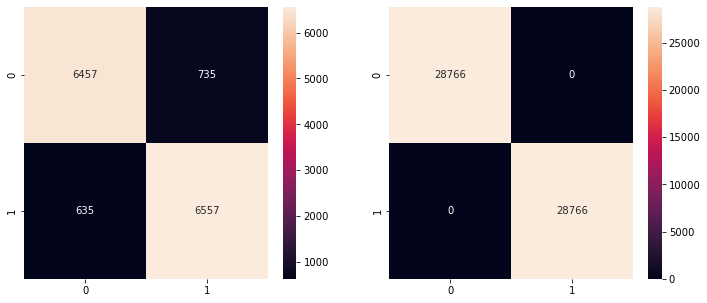

In [177]:
fig,axes = plt.subplots(1,2,figsize = (12,5))
sns.heatmap(confusion_matrix(y_test,y_test_pred),fmt = 'd',annot = True, ax = axes[0])
sns.heatmap(confusion_matrix(y_train,y_train_pred),fmt = 'd',annot = True,ax = axes[1])
#plt.savefig("Logistic median.png")
plt.show()

In [392]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, make_scorer

#f1 = make_scorer(f1_score , average='weighted')
#dt = dct(random_state = 3)
#params = {"max_depth": [6,8,10,12,14,16], 'min_samples_split':[2,4,6,8,10,12],'min_samples_leaf':[1,2,4,6]}

#gsearch_dt = GridSearchCV(dt,param_grid=params, cv = 6,scoring = ['f1_weighted','precision_weighted'],return_train_score=True,n_jobs = -1, refit = 'f1_weighted')

#gsearch_dt.fit(X1,y)
#gsearch_dt.best_params_

In [ ]:
from sklearn.ensemble import BaggingClassifier
dt = dct(max_depth = 19, min_samples_leaf = 6, min_samples_split = 2)
bc = BaggingClassifier(base_estimator=dt, n_estimators=2000, random_state=1, oob_score=True)
dt.fit(X_train,y_train)
y_train_pred_dt = dt.predict(X_train)
y_train_prob_dt = dt.predict_proba(X_train)
y_test_pred_dt = dt.predict(X_test)
y_test_prob_dt = dt.predict_proba(X_test)
print("Accuracy",accuracy_score(y_train,y_train_pred_dt))
print("F1 train", f1_score(y_train,y_train_pred_dt,average = 'weighted'))
print("recall",recall_score(y_train,y_train_pred_dt,average = 'weighted'))
print("Precision",precision_score(y_train,y_train_pred_dt,average = 'weighted'))

print("\n")
print("Accuracy",accuracy_score(y_test,y_test_pred_dt))
print("F1 test",f1_score(y_test,y_test_pred_dt,average = 'weighted'))
print("recall",recall_score(y_test,y_test_pred_dt,average = 'weighted'))
print("Precision",precision_score(y_test,y_test_pred_dt,average = 'weighted'))

### Gradient Boosting

In [393]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
gbc1=GradientBoostingClassifier(n_estimators=500,learning_rate=0.05,random_state=100,max_features=5 )
gbc1.fit(X_train,y_train)

y_train_pred_gbc = gbc1.predict(X_train)
y_train_prob_gbc = gbc1.predict_proba(X_train)
y_test_pred_gbc = gbc1.predict(X_test)
y_test_prob_gbc = gbc1.predict_proba(X_test)
print("Accuracy",accuracy_score(y_train,y_train_pred_gbc))
print("F1 train", f1_score(y_train,y_train_pred_gbc,average = 'weighted'))
print("recall",recall_score(y_train,y_train_pred_gbc,average = 'weighted'))
print("Precision",precision_score(y_train,y_train_pred_gbc,average = 'weighted'))

print("\n")
print("Accuracy",accuracy_score(y_test,y_test_pred_gbc))
print("F1 test",f1_score(y_test,y_test_pred_gbc,average = 'weighted'))
print("recall",recall_score(y_test,y_test_pred_gbc,average = 'weighted'))
print("Precision",precision_score(y_test,y_test_pred_gbc,average = 'weighted'))

Accuracy 0.940273930142002
F1 train 0.9402433611669839
recall 0.940273930142002
Precision 0.9411758539156478


Accuracy 0.9397907787679194
F1 test 0.9397635250301155
recall 0.9397907787679194
Precision 0.9405912583612092


### Gradient Boosting Hyperparameters Tuning

In [359]:
gbc = GradientBoostingClassifier()
skf = StratifiedKFold(n_splits=6, random_state = 1001, shuffle = True )
parameters_gbc= {
    "n_estimators":[5,50,250,500],
    "max_depth":[1,3,5,7,9],
    "learning_rate":[0.01,0.05,0.1,1,10,100]
}

rsearch_gbc = RandomizedSearchCV(gbc, param_distributions=parameters_gbc, scoring=['f1_weighted','precision_weighted'], n_iter=100,
                            cv=skf.split(X_train,y_train), n_jobs=-1, return_train_score=True, refit = 'f1_weighted')

rsearch_gbc.fit(X_train, y_train)

RandomizedSearchCV(cv=<generator object _BaseKFold.split at 0x7f826489ef90>,
                   estimator=GradientBoostingClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 1, 10,
                                                          100],
                                        'max_depth': [1, 3, 5, 7, 9],
                                        'n_estimators': [5, 50, 250, 500]},
                   refit='f1_weighted', return_train_score=True,
                   scoring=['f1_weighted', 'precision_weighted'])

In [361]:
gbc = GradientBoostingClassifier(**rsearch_gbc.best_params_,   random_state=3)

gbc.fit(X_train, y_train)

y_train_pred_gbc1 = gbc.predict(X_train)
y_train_prob_gbc1 = gbc.predict_proba(X_train)

y_test_pred_gbc1 = gbc.predict(X_test)
y_test_prob_gbc1 = gbc.predict_proba(X_test)


print("Accuracy",accuracy_score(y_train,y_train_pred_gbc1))
#print("AUC train", roc_auc_score(y_train,y_train_prob_rf1))
print("F1 train", f1_score(y_train,y_train_pred_gbc1,average = 'weighted'))
print("recall",recall_score(y_train,y_train_pred_gbc1,average = 'weighted'))
print("Precision",precision_score(y_train,y_train_pred_gbc1,average = 'weighted'))

print("\n")
print("Accuracy",accuracy_score(y_test,y_test_pred_gbc1))
#print("AUC test",roc_auc_score(y_test1,y_test_prob_rf1,multi_class = "ovo"))
print("F1 test",f1_score(y_test,y_test_pred_gbc1,average = 'weighted'))
print("recall",recall_score(y_test,y_test_pred_gbc1,average = 'weighted'))
print("Precision",precision_score(y_test,y_test_pred_gbc1,average = 'weighted'))

/Users/vivek/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vivek/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vivek/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vivek/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_cl

Accuracy 1.0
F1 train 1.0
recall 1.0
Precision 1.0


Accuracy 0.9447500968616815
F1 test 0.9447425816297482
recall 0.9447500968616815
Precision 0.9449938941433242


### File Pickle

In [395]:
import pickle
filename = 'GB_Model'
pickle.dump(gbc1, open(filename, 'wb'))
pred = gbc1.predict(X1)